[0, 9.04, 17.67, 25.905, 33.82, 41.325, 49.2, 56.475, 63.87, 71.11, 78.2, 84.855, 91.56, 98.035, 104.61, 110.955, 117.295, 123.415, 129.565, 135.725, 142.0, 147.745, 153.425, 159.355, 165.095, 170.965, 176.485, 182.23, 187.655, 193.2, 198.655, 204.035, 209.435, 214.52, 219.585, 224.94, 230.245, 235.535, 240.76, 245.98, 250.845, 256.04, 261.08, 266.285, 271.145, 276.22, 281.35, 286.295, 291.315, 295.875, 300.615, 305.165, 309.87, 314.705, 319.48, 324.11, 328.67, 333.165, 337.63, 342.07, 346.44, 351.075, 355.56, 359.785, 364.065, 368.55, 372.885, 377.445, 381.335, 385.575, 389.735, 394.265, 398.69, 403.045, 407.155, 411.455, 415.495, 419.765, 424.09, 428.315, 432.215, 436.14, 440.29, 444.115, 448.09, 452.09, 456.17, 460.195, 464.42, 468.1, 472.09, 475.97, 479.93, 483.79, 487.77, 491.645, 495.505, 499.265, 503.13, 506.83, 510.555, 514.55, 518.435, 522.25, 526.19, 530.0, 533.61, 537.42, 540.97, 544.68, 548.395, 551.935, 555.68, 559.165, 562.675, 566.14, 569.535, 573.075, 576.65, 580.22, 58

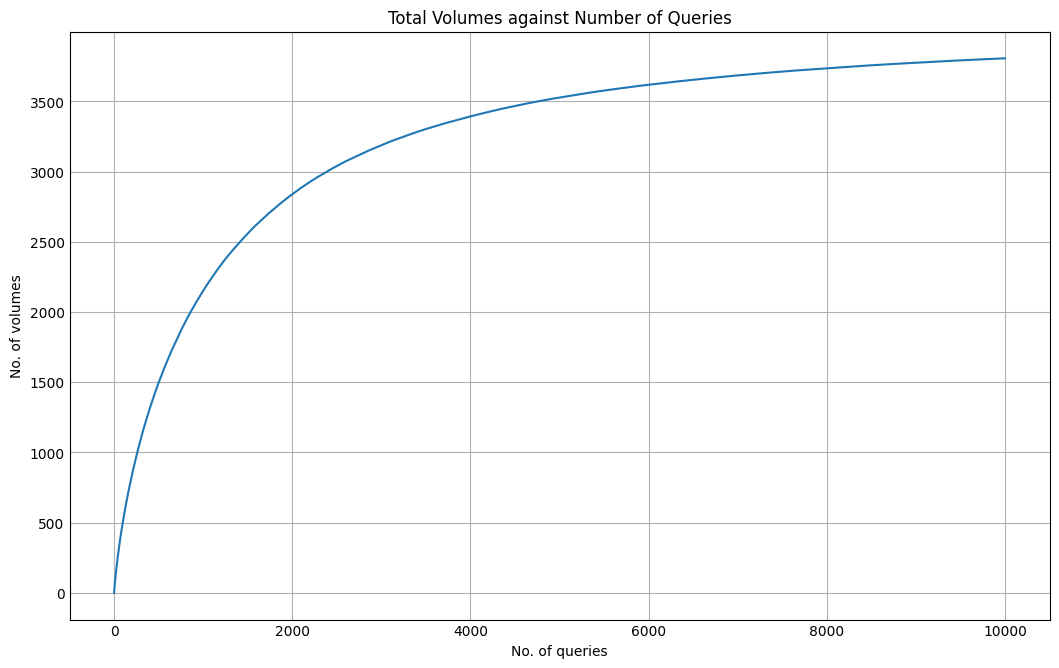

In [6]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)


max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 10000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

print (arr)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()



